In [14]:
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
import matplotlib.patheffects as path_effects

In [2]:
# France vs Poland
MATCH_ID = 3869152

In [3]:
parser = Sbopen()
events, related, freeze, players = parser.event(MATCH_ID)
TEAM = 'Poland'

In [6]:
poland_pressure = (events.team_name == TEAM) & (events.type_name == 'Pressure')
poland_pressure = events.loc[poland_pressure, ['x', 'y']]

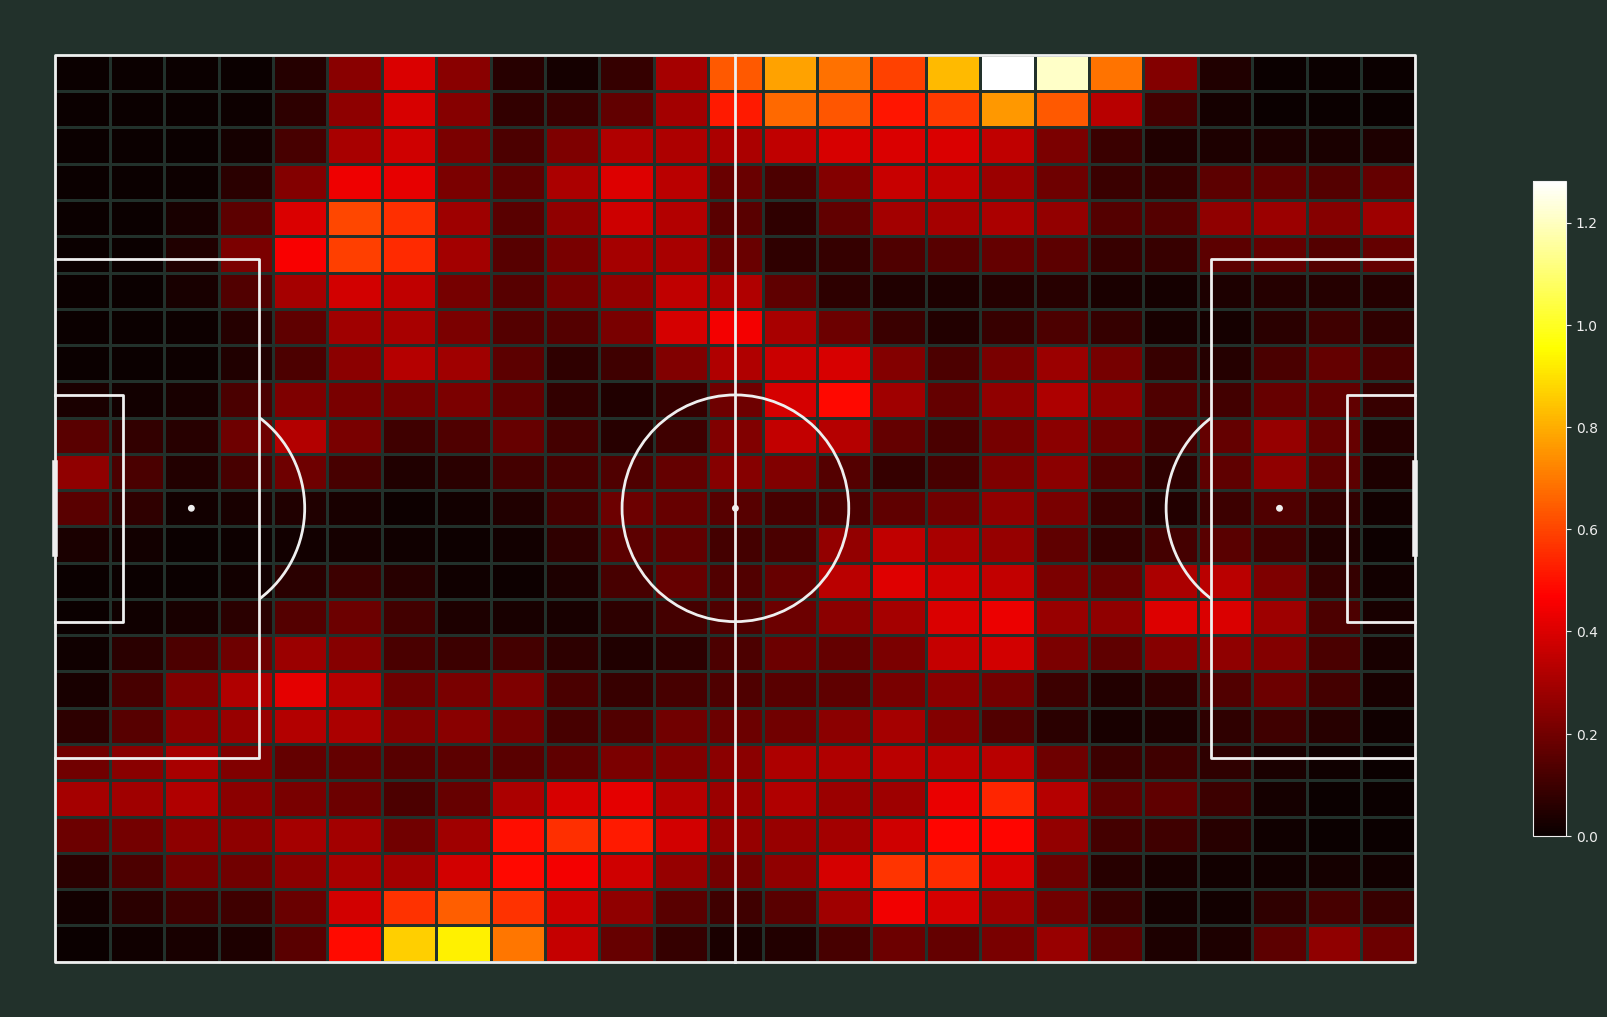

In [13]:
# setup pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(poland_pressure.x, poland_pressure.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')

# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

In [16]:
# path effects
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()]

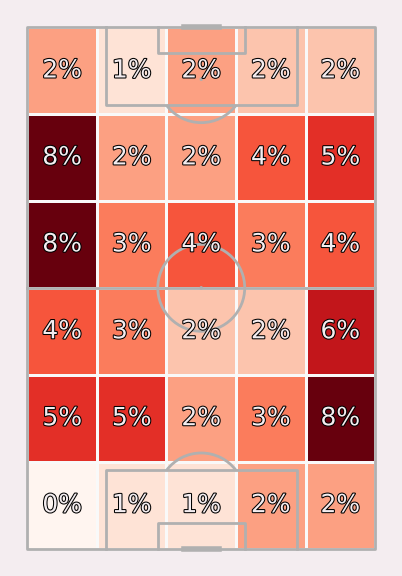

In [19]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0')
fig, ax = pitch.draw(figsize=(4.125, 6))
fig.set_facecolor('#f4edf0')
bin_statistic = pitch.bin_statistic(poland_pressure.x, poland_pressure.y, statistic='count', bins=(6, 5), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)